In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
# 1. 데이터 준비 : -> 정규화, 범주형 -> 인코딩 -> 원핫인코딩
# 예제 데이터 생성 (여기서는 임의로 데이터를 생성합니다. 실제 데이터로 교체 가능)
from sklearn.datasets import make_classification
X, y=make_classification(n_samples=1000, n_features=20, n_informative=15, 
n_redundant=5, random_state=42)


In [4]:
# 데이터 분할 -> 훈련 : 검증 : 테스트 => 70 : 15 : 15
X_train, X_temp, y_train, y_temp=train_test_split(X, y, test_size=0.3, 
random_state=42)
X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, 
test_size=0.5, random_state=42)

In [5]:
# 데이터 정규화 (특성 스케일링)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [6]:
# 모델 설계
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층
    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한 
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
 ])

In [7]:
# 컴파일
# 손실 함수: Binary Cross-Entropy
# 최적화 알고리즘: Adam
# 평가지표: Accuracy
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [8]:
# 4. Early Stopping 설정
# 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                patience=5, 
                                                restore_best_weights=True)
 # 5. 모델 훈련
history=model.fit(X_train, 
                  y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=50, 
                  batch_size=32, 
                  callbacks=[early_stopping])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4897 - loss: 0.7238 - val_accuracy: 0.6267 - val_loss: 0.6592
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6402 - loss: 0.6431 - val_accuracy: 0.7867 - val_loss: 0.5844
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6976 - loss: 0.5961 - val_accuracy: 0.8600 - val_loss: 0.5165
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7447 - loss: 0.5467 - val_accuracy: 0.8733 - val_loss: 0.4541
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.4866 - val_accuracy: 0.8933 - val_loss: 0.3972
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.4222 - val_accuracy: 0.9000 - val_loss: 0.3421
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8262 - loss: 0.4301 - val_accuracy: 0.9000 - val_loss: 0.3095
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8278 - loss: 0.3865 - val_accuracy: 0.9133 - val_loss:

In [9]:
# 6. 모델 평가
# 테스트 데이터로 성능 평가
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f"TestLoss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9214 - loss: 0.1738 
TestLoss: 0.1520, Test Accuracy: 0.9333


In [10]:
# 7. 예측
# 새로운 데이터에 대한 예측 수행
predictions=model.predict(X_test)
predicted_classes=(predictions>0.5).astype(int) # 0.5를 기준으로 클래스 결정

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

ClassificationReport:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.92      0.94      0.93        71

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [11]:
# 8. 분류 보고서 출력
# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassificationReport:")
print(classification_report(y_test, predicted_classes))


ClassificationReport:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.92      0.94      0.93        71

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



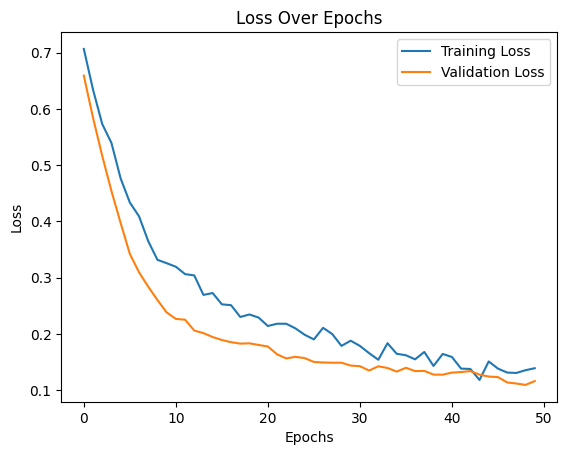

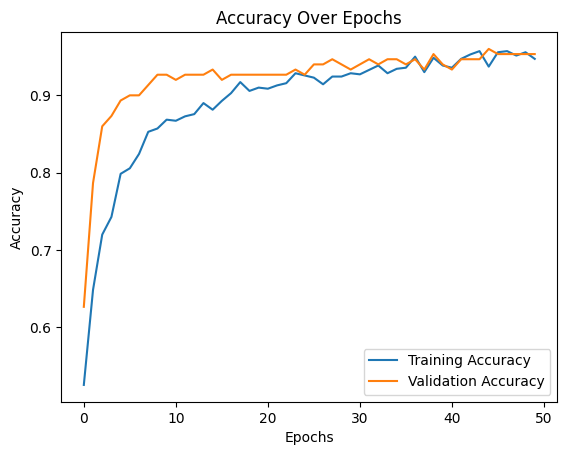

In [12]:
# 9. 학습 결과 시각화 (Optional)
import matplotlib.pyplot as plt
 # 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
 # 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()